# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [219]:
import pandas as pd 
import numpy as np

In [221]:
# Read in the customer data
Customers = pd.read_csv('UDEMYPYTHON/maven_music_customers.csv')
Customers.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN


In [223]:
# Read in the listening history
listening_history = pd.read_excel('UDEMYPYTHON/maven_music_listening_history.xlsx', sheet_name = 0)
listening_history.head(2)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song


In [225]:
# Hint: Where might you find listening history data beyond the ID's?
audio_files = pd.read_excel('UDEMYPYTHON/maven_music_listening_history.xlsx', sheet_name = 1)
audio_files.head(2)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2


In [227]:
# Read in the audio data
audio_files.head(2)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2


In [229]:
# Read in the session data
session_data = pd.read_excel('UDEMYPYTHON/maven_music_listening_history.xlsx', sheet_name = 2)
session_data.head(2)

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [163]:
Customers.head(1)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN


In [165]:
# Check the data types
Customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [241]:
# Convert objects to numeric and datetime fields
Customers['Member Since'] = pd.to_datetime(Customers['Member Since'], format = 'mixed')
Customers['Member Since'].head(2)

0   2023-03-13
1   2023-03-13
Name: Member Since, dtype: datetime64[ns]

In [171]:
Customers['Cancellation Date'] = pd.to_datetime(Customers['Cancellation Date'], format = 'mixed')
Customers['Cancellation Date'].head(4)

0          NaT
1          NaT
2   2023-06-01
3          NaT
Name: Cancellation Date, dtype: datetime64[ns]

In [233]:
Customers['Subscription Rate'] = Customers['Subscription Rate'].str.replace('$','')
Customers['Subscription Rate'].head(2)

0    2.99 
1    2.99 
Name: Subscription Rate, dtype: object

In [235]:
Customers['Subscription Rate'] = pd.to_numeric(Customers['Subscription Rate'])
Customers['Subscription Rate'].head(2)

0    2.99
1    2.99
Name: Subscription Rate, dtype: float64

In [237]:
Customers = Customers.rename(columns = {'Discount?':'Discount'})
Customers.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,2.99,NaN,NaN


In [239]:
Customers.dtypes

Customer ID            int64
Customer Name         object
Email                 object
Member Since          object
Subscription Plan     object
Subscription Rate    float64
Discount              object
Cancellation Date     object
dtype: object

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [181]:
# Look for NaN values in the data
Customers[Customers.isna().any(axis =1)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,3/20/23,NaN,2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,3/21/23,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,3/22/23,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,3/28/23,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,3/28/23,Basic (Ads),2.99,NaN,NaT


In [259]:
# first we work on Subscription Plan column where there is Subscription Rate =2.99 then it is Basic ad
Customers['Subscription Plan'] = np.where(Customers['Subscription Rate'] == 2.99, 'Basic (Ads)', Customers['Subscription Plan'])
Customers['Subscription Plan']


0          Basic (Ads)
1          Basic (Ads)
2          Basic (Ads)
3          Basic (Ads)
4          Basic (Ads)
5          Basic (Ads)
6     Premium (No Ads)
7     Premium (No Ads)
8     Premium (No Ads)
9          Basic (Ads)
10         Basic (Ads)
11         Basic (Ads)
12    Premium (No Ads)
13         Basic (Ads)
14    Premium (No Ads)
15    Premium (No Ads)
16         Basic (Ads)
17         Basic (Ads)
18         Basic (Ads)
19         Basic (Ads)
20         Basic (Ads)
21    Premium (No Ads)
22    Premium (No Ads)
23    Premium (No Ads)
24         Basic (Ads)
25    Premium (No Ads)
26    Premium (No Ads)
27         Basic (Ads)
28    Premium (No Ads)
29    Premium (No Ads)
Name: Subscription Plan, dtype: object

In [185]:
Customers['Subscription Rate'].value_counts()

Subscription Rate
2.99     17
7.99      7
9.99      5
99.99     1
Name: count, dtype: int64

In [187]:
Customers.loc[15, 'Subscription Rate'] = 9.99

In [189]:
Customers['Subscription Rate'].value_counts()

Subscription Rate
2.99    17
7.99     7
9.99     6
Name: count, dtype: int64

In [251]:
# Now replace discount NaN with 0
Customers.Discount = Customers.Discount.fillna('No')
Customers.Discount

0      No
1      No
2      No
3      No
4      No
5      No
6      No
7      No
8      No
9      No
10     No
11     No
12     No
13     No
14     No
15     No
16     No
17     No
18     No
19     No
20     No
21    Yes
22    Yes
23    Yes
24     No
25    Yes
26    Yes
27     No
28    Yes
29    Yes
Name: Discount, dtype: object

In [193]:
Customers.tail(3)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
27,7579,Jazz Drummond,Email: drumming.jazz@email.com,5/15/23,Basic (Ads),2.99,No,NaT
28,7581,Lyric Keys,Email: keysoflyric@email.com,5/16/23,Premium (No Ads),7.99,Yes,2023-06-03
29,7583,Melody Singer,Email: melodic.singer@email.com,5/16/23,Premium (No Ads),7.99,Yes,2023-06-01


In [ ]:
# if want to add any date manually first convert this into strng then add date then again convert to datetime
# or if datetime coloumn is already in object format and you want to add some date in place of NaN
# first add all desired values then convert it to datetime in last

In [ ]:
# TIP -1 (i am not using here but if cases are like that)
Customers['Cancellation Date'] = np.where(
    (Customers['Subscription Plan'] == 'Premium (No Ads)') &
    (Customers['Subscription Rate'] == 7.99) & pd.isna(Customers['Cancellation Date']),'2023-06-02', Customers['Cancellation Date']
)

In [ ]:
# TIP -2
To fill Cancellation Date NaN value with Subscription Plan- Basic (Ads)	- with 2023-06-01
# means Jaha Subscription Plan- Basic (Ads) ho aur waha Cancellation Date NaN ho waha 2023-06-01 fill kr de
# Use commond 
# Customers['Cancellation Date'] = np.where((Customers['Subscription Plan'] == 'Basic (Ads)') & pd.isnaCustomers['Cancellation Date']),'2023-06-01', Customers['Cancellation Date'])

Customers['Cancellation Date'] = np.where((Customers['Subscription Plan'] == 'Basic (Ads)') & pd.isna(Customers['Cancellation Date']),'2023-06-01', Customers['Cancellation Date'])

In [261]:
# here i applied this
Customers['Cancellation Date'] = np.where(
    (Customers['Subscription Plan'] == 'Premium (No Ads)') &
    (Customers['Subscription Rate'] == 7.99) & pd.isna(Customers['Cancellation Date']),'2023-06-02', Customers['Cancellation Date']
)

In [263]:
Customers

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaN
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,No,6/3/23
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,No,NaN
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,6/2/23
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,No,NaN
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,No,2023-06-01


In [265]:
Customers['Cancellation Date'] = np.where(
    (Customers['Subscription Plan'] == 'Basic (Ads)') &
    (Customers['Subscription Rate'] == 2.99) & pd.isna(Customers['Cancellation Date']),'2023-06-01', Customers['Cancellation Date']
)

In [267]:
Customers

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,2023-06-01
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,2023-06-01
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,No,6/3/23
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,No,NaN
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,6/2/23
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,No,NaN
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,No,2023-06-01


In [269]:
Customers['Cancellation Date'] = pd.to_datetime(Customers['Cancellation Date'], format = 'mixed')

In [271]:
Customers

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,2023-06-01
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,2023-06-01
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,No,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,No,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,No,2023-06-01


In [273]:
Customers.to_pickle('Customers_new.pkl')

In [291]:
Customers_new = pd.read_pickle('Customers_new.pkl')

In [293]:
Customers_new.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount                     object
Cancellation Date    datetime64[ns]
dtype: object

#### ii. Inconsistent Text & Typos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
Customers_new = pd.read_pickle('Customers_new.pkl')
Customers_new.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,2023-06-01


In [9]:
# Look for inconsistent text & typos

Customers_new['Subscription Plan'].value_counts()

Subscription Plan
Basic (Ads)         17
Premium (No Ads)    13
Name: count, dtype: int64

In [11]:
Customers_new['Subscription Rate'].value_counts()

Subscription Rate
2.99     17
7.99      7
9.99      5
99.99     1
Name: count, dtype: int64

In [15]:
Customers_new['Subscription Rate'] = np.where(Customers_new['Subscription Rate'] == 99.99,9.99,Customers_new['Subscription Rate'])

In [ ]:
# or can also be fixed by
# Fix the 99.99 typo
customers.iloc[15, 5] = 9.99

In [17]:
Customers_new['Subscription Rate'].value_counts()

Subscription Rate
2.99    17
7.99     7
9.99     6
Name: count, dtype: int64

In [19]:
Customers_new['Discount'].value_counts()

Discount
No     23
Yes     7
Name: count, dtype: int64

In [21]:
Customers_new['Cancellation Date'].value_counts()

Cancellation Date
2023-06-01    19
2023-06-02     6
2023-06-03     2
Name: count, dtype: int64

In [25]:
Customers_new.describe()

,Customer ID,Member Since,Subscription Rate,Cancellation Date
count,30.000000,30,30.000000,27
mean,6276.333333,2023-04-10 06:24:00,5.556667,2023-06-01 08:53:20
min,5001.000000,2023-03-13 00:00:00,2.990000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,2023-06-01 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,NaN


In [27]:
Customers_new['Member Since']	

0    2023-03-13
1    2023-03-13
2    2023-03-13
3    2023-03-20
4    2023-03-20
5    2023-03-20
6    2023-03-21
7    2023-03-22
8    2023-03-28
9    2023-03-28
10   2023-03-28
11   2023-03-28
12   2023-03-29
13   2023-04-01
14   2023-04-05
15   2023-04-06
16   2023-04-08
17   2023-04-09
18   2023-04-16
19   2023-04-16
20   2023-04-24
21   2023-05-01
22   2023-05-01
23   2023-05-01
24   2023-05-07
25   2023-05-08
26   2023-05-08
27   2023-05-15
28   2023-05-16
29   2023-05-16
Name: Member Since, dtype: datetime64[ns]

#### iii. Duplicate Rows

In [23]:
# Look for duplicate rows
Customers_new[Customers_new.duplicated(keep = False)]


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date


In [29]:
# can also be checked by
Customers_new[Customers_new.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date


#### iv. Outliers

In [31]:
# Look for outliers
Customers_new.describe()

,Customer ID,Member Since,Subscription Rate,Cancellation Date
count,30.000000,30,30.000000,27
mean,6276.333333,2023-04-10 06:24:00,5.556667,2023-06-01 08:53:20
min,5001.000000,2023-03-13 00:00:00,2.990000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,2023-06-01 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,NaN


### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [35]:
Customers_new

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,2023-06-01
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,2023-06-01
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,No,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,No,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,No,2023-06-01


In [43]:
# Create a 'Cancelled' column
# what we are doing here is creating a cancelled column where there is cancellation date it is come up with 1 else 0

Customers_new['Cancelled'] = np.where(Customers_new['Cancellation Date'].notna(),1,0)
Customers_new

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-01,1
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,2023-06-01,1
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-03,1
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,No,NaT,0
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02,1
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,No,NaT,0
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,No,2023-06-01,1


In [47]:
Customers_new.to_pickle('Customers_new2.pkl')

In [ ]:
# Create an updated 'Email' column without the Email: portion
# done by two way
# 1- customers['Email'] = customers.Email.str[6:]
# 2 - BY splitting into two columns

In [59]:
Customers_new = pd.read_pickle('Customers_new2.pkl')

In [61]:
Customers_new.Email= Customers_new.Email.str.split(':')

In [63]:
Customers_new[['Email','portion']] = pd.DataFrame(Customers_new.Email.to_list(),columns = ['Email','portion'])

In [67]:
Customers_new.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled,portion
0,5001,Harmony Greene,Email,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1,harmonious.vibes@email.com
1,5002,Aria Keys,Email,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1,melodious.aria@email.edu
2,5004,Lyric Bell,Email,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1,rhythmical.lyric@email.com
3,5267,Rock Bassett,Email,2023-03-20,Basic (Ads),2.99,No,2023-06-01,1,groovy.rock@email.com
4,5338,Rhythm Dixon,Email,2023-03-20,Basic (Ads),2.99,No,2023-06-01,1,beats.by.rhythm@email.edu


In [69]:
Customers_new.to_pickle('Customers_new2.pkl')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
Customers_new = pd.read_pickle('Customers_new2.pkl')
Customers_new.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled,portion,Membership_duration
0,5001,Harmony Greene,Email,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1,harmonious.vibes@email.com,80 days
1,5002,Aria Keys,Email,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1,melodious.aria@email.edu,80 days


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [7]:
# How long were customers members before they cancelled?
Customers_new['Membership_duration'] = Customers_new['Cancellation Date'] - Customers_new['Member Since']
Customers_new

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled,portion,Membership_duration
0,5001,Harmony Greene,Email,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1,harmonious.vibes@email.com,80 days
1,5002,Aria Keys,Email,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1,melodious.aria@email.edu,80 days
2,5004,Lyric Bell,Email,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1,rhythmical.lyric@email.com,80 days
3,5267,Rock Bassett,Email,2023-03-20,Basic (Ads),2.99,No,2023-06-01,1,groovy.rock@email.com,73 days
4,5338,Rhythm Dixon,Email,2023-03-20,Basic (Ads),2.99,No,2023-06-01,1,beats.by.rhythm@email.edu,73 days
5,5404,Jazz Saxton,Email,2023-03-20,Basic (Ads),2.99,No,2023-06-03,1,jazzy.sax@email.com,75 days
6,5581,Reed Sharp,Email,2023-03-21,Premium (No Ads),9.99,No,NaT,0,sharp.tunes@email.com,NaT
7,5759,Carol Kingbird,Email,2023-03-22,Premium (No Ads),9.99,No,2023-06-02,1,songbird.carol@email.com,72 days
8,5761,Sonata Nash,Email,2023-03-28,Premium (No Ads),9.99,No,NaT,0,musical.sonata@email.com,NaT
9,5763,Jazz Coleman,Email,2023-03-28,Basic (Ads),2.99,No,2023-06-01,1,coleman.jazzmaster@email.com,65 days


In [9]:
# How long were customers members before they cancelled? (Now remove days only in numeric)
(Customers_new['Cancellation Date'] - Customers_new['Member Since']).dt.days


0     80.0
1     80.0
2     80.0
3     73.0
4     73.0
5     75.0
6      NaN
7     72.0
8      NaN
9     65.0
10    65.0
11    65.0
12    65.0
13    61.0
14     NaN
15    57.0
16    54.0
17    53.0
18    46.0
19    46.0
20    38.0
21    32.0
22    32.0
23    32.0
24    25.0
25    24.0
26    24.0
27    17.0
28    18.0
29    16.0
dtype: float64

In [11]:
# How long were customers members before they cancelled? (in months)
((Customers_new['Cancellation Date'] - Customers_new['Member Since']).dt.days/30)

0     2.666667
1     2.666667
2     2.666667
3     2.433333
4     2.433333
5     2.500000
6          NaN
7     2.400000
8          NaN
9     2.166667
10    2.166667
11    2.166667
12    2.166667
13    2.033333
14         NaN
15    1.900000
16    1.800000
17    1.766667
18    1.533333
19    1.533333
20    1.266667
21    1.066667
22    1.066667
23    1.066667
24    0.833333
25    0.800000
26    0.800000
27    0.566667
28    0.600000
29    0.533333
dtype: float64

In [13]:
Customers_new.head(1)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled,portion,Membership_duration
0,5001,Harmony Greene,Email,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1,harmonious.vibes@email.com,80 days


In [15]:
Customers_new['Discount'] = np.where(Customers_new['Discount']=='Yes', 1, 0)
Customers_new

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled,portion,Membership_duration
0,5001,Harmony Greene,Email,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1,harmonious.vibes@email.com,80 days
1,5002,Aria Keys,Email,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1,melodious.aria@email.edu,80 days
2,5004,Lyric Bell,Email,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1,rhythmical.lyric@email.com,80 days
3,5267,Rock Bassett,Email,2023-03-20,Basic (Ads),2.99,0,2023-06-01,1,groovy.rock@email.com,73 days
4,5338,Rhythm Dixon,Email,2023-03-20,Basic (Ads),2.99,0,2023-06-01,1,beats.by.rhythm@email.edu,73 days
5,5404,Jazz Saxton,Email,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1,jazzy.sax@email.com,75 days
6,5581,Reed Sharp,Email,2023-03-21,Premium (No Ads),9.99,0,NaT,0,sharp.tunes@email.com,NaT
7,5759,Carol Kingbird,Email,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1,songbird.carol@email.com,72 days
8,5761,Sonata Nash,Email,2023-03-28,Premium (No Ads),9.99,0,NaT,0,musical.sonata@email.com,NaT
9,5763,Jazz Coleman,Email,2023-03-28,Basic (Ads),2.99,0,2023-06-01,1,coleman.jazzmaster@email.com,65 days


In [17]:
# Cancellation rate for those who had a discount
yes_discount = Customers_new[Customers_new['Discount'] == 1]
yes_discount

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled,portion,Membership_duration
21,6822,Kiki Keys,Email,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1,kiki.keys.piano@email.com,32 days
22,6824,Greta Groove,Email,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1,groovy.greta@email.com,32 days
23,7087,Harmony Heart,Email,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1,heartfelt.harmony@email.com,32 days
25,7224,Melody Fitzgerald,Email,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1,fitzgerald.melody@email.com,24 days
26,7401,Reed Murphy,Email,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1,murphy.reed.music@email.com,24 days
28,7581,Lyric Keys,Email,2023-05-16,Premium (No Ads),7.99,1,2023-06-03,1,keysoflyric@email.com,18 days
29,7583,Melody Singer,Email,2023-05-16,Premium (No Ads),7.99,1,2023-06-01,1,melodic.singer@email.com,16 days


In [19]:
# Cancellation rate for those who had a discount
yes_discount.Cancelled.sum()/yes_discount.Cancelled.count()

1.0

In [25]:
# Cancellation rate for those who did not have a discount
no_discount  = Customers_new[Customers_new['Discount']==0]
no_discount 

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled,portion,Membership_duration
0,5001,Harmony Greene,Email,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1,harmonious.vibes@email.com,80 days
1,5002,Aria Keys,Email,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1,melodious.aria@email.edu,80 days
2,5004,Lyric Bell,Email,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1,rhythmical.lyric@email.com,80 days
3,5267,Rock Bassett,Email,2023-03-20,Basic (Ads),2.99,0,2023-06-01,1,groovy.rock@email.com,73 days
4,5338,Rhythm Dixon,Email,2023-03-20,Basic (Ads),2.99,0,2023-06-01,1,beats.by.rhythm@email.edu,73 days
5,5404,Jazz Saxton,Email,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1,jazzy.sax@email.com,75 days
6,5581,Reed Sharp,Email,2023-03-21,Premium (No Ads),9.99,0,NaT,0,sharp.tunes@email.com,NaT
7,5759,Carol Kingbird,Email,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1,songbird.carol@email.com,72 days
8,5761,Sonata Nash,Email,2023-03-28,Premium (No Ads),9.99,0,NaT,0,musical.sonata@email.com,NaT
9,5763,Jazz Coleman,Email,2023-03-28,Basic (Ads),2.99,0,2023-06-01,1,coleman.jazzmaster@email.com,65 days


In [27]:
no_discount.Cancelled.sum()/no_discount.Cancelled.count()

0.8695652173913043

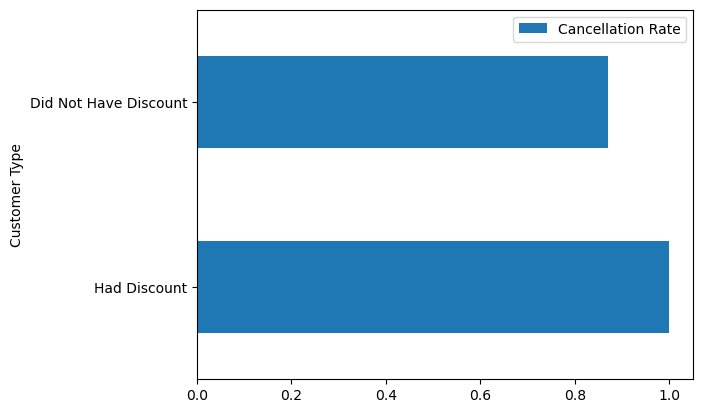

In [29]:
# Visualize the cancellation rate for those with a discount vs those without a discount
pd.DataFrame([['Had Discount', 1.0],
             ['Did Not Have Discount',0.8695652173913043]],
             columns=['Customer Type', 'Cancellation Rate']).plot.barh(x='Customer Type', y='Cancellation Rate', );

In [31]:
Customers_new.to_pickle('Customers_new2.pkl')

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [59]:
# Split the ID in the audio data so the column can be joined with other tables
audio_files = pd.read_excel('UDEMYPYTHON/maven_music_listening_history.xlsx', sheet_name = 1)
audio_files.head(2)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2


In [17]:
clean_audio = pd.read_excel('UDEMYPYTHON/maven_music_listening_history.xlsx', sheet_name = 1)
clean_audio.head(1)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1


In [61]:
audio_files['ID'] = audio_files.ID.str.split('-')
audio_files[['Audio Type','Audio ID']] =  pd.DataFrame(audio_files.ID.to_list(),columns = ['Audio Type','Audio ID'])


In [63]:
audio_files.head(2)

,ID,Name,Genre,Popularity,Audio Type,Audio ID
0,"[Song, 101]",Dance All Night,Pop,1,Song,101
1,"[Song, 102]",Unbreakable Beat,Pop,2,Song,102


In [65]:
# Hint: Check the data type of Audio ID in the audio table
audio_files.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
Audio Type    object
Audio ID      object
dtype: object

In [69]:
audio_files['Audio ID'] = pd.to_numeric(audio_files['Audio ID'])

In [71]:
audio_files.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
Audio Type    object
Audio ID       int64
dtype: object

In [13]:
# The number of listening sessions that each customer had in the past 3 months
listening_history = pd.read_excel('UDEMYPYTHON/maven_music_listening_history.xlsx', sheet_name = 0)
listening_history.head(2)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song


In [15]:
session_data = pd.read_excel('UDEMYPYTHON/maven_music_listening_history.xlsx', sheet_name = 2)
session_data.head(2)

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00


In [17]:
Customer_attendsess = listening_history.merge(session_data, how = 'left', on = 'Session ID')
Customer_attendsess

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Session Log In Time
0,5001,100520,1,101,Song,2023-03-13 18:29:00
1,5001,100520,2,102,Song,2023-03-13 18:29:00
2,5001,100520,3,103,Song,2023-03-13 18:29:00
3,5001,100520,4,104,Song,2023-03-13 18:29:00
4,5001,100520,5,105,Song,2023-03-13 18:29:00
...,...,...,...,...,...,...
500,7579,111282,4,111,Song,2023-05-23 23:51:00
501,6588,111286,1,201,Podcast,2023-05-27 02:15:00
502,5763,111333,1,110,Song,2023-05-27 20:46:00
503,5763,111333,2,108,Song,2023-05-27 20:46:00


In [41]:
Customer_attendsess.groupby('Customer ID')['Session ID'].count()

Customer ID
5001    60
5002    22
5004     9
5267    45
5338    18
5404     8
5581     5
5759    15
5761     5
5763    31
5826    17
5827     7
6029    12
6092    10
6163     4
6229    13
6406     9
6584    27
6586    22
6588    10
6821    21
6822    15
6824    31
7087    11
7158    13
7224    29
7401    11
7579     9
7581    14
7583     2
Name: Session ID, dtype: int64

In [45]:
Customer_attendsess.groupby('Customer ID')['Session ID'].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

In [51]:
Customer_attendsess.groupby('Customer ID')['Session ID'].nunique().sort_values(ascending = False)

Customer ID
5001    8
5267    7
5763    6
6824    4
5338    4
5002    4
7224    4
7158    3
7087    3
6406    3
6163    3
6092    3
5826    3
6822    3
5761    3
7401    3
5581    3
6588    3
7579    2
7581    2
6229    2
6821    2
6586    2
6584    2
6029    2
5759    2
5827    1
5404    1
5004    1
7583    1
Name: Session ID, dtype: int64

In [77]:
# The most popular genres that customers listened to
popular_genres = listening_history.merge(audio_files, how = 'left', on = 'Audio ID')
popular_genres.head(2)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type_x,ID,Name,Genre,Popularity,Audio Type_y
0,5001,100520,1,101,Song,"[Song, 101]",Dance All Night,Pop,1,Song
1,5001,100520,2,102,Song,"[Song, 102]",Unbreakable Beat,Pop,2,Song


In [79]:
# The most popular genres that customers listened to
popular_genres.Genre.value_counts()

Genre
Pop Music     167
Pop           100
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [7]:
Customers_new2 = pd.read_pickle('Customers_new2.pkl')
Customers_new2.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Cancelled,portion,Membership_duration
0,5001,Harmony Greene,Email,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1,harmonious.vibes@email.com,80 days
1,5002,Aria Keys,Email,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1,melodious.aria@email.edu,80 days


In [23]:
list_sess = Customer_attendsess.groupby('Customer ID')['Session ID'].nunique().sort_values(ascending = False)
list_sess.head(2)

Customer ID
5001    8
5267    7
Name: Session ID, dtype: int64

In [27]:
Customers_new3.shape

(30, 3)

In [29]:
list_sess.shape

(30,)

In [31]:
Customers_new3 = Customers_new2 [['Customer ID','Cancelled','Discount']]
Customers_new3.head(2)

,Customer ID,Cancelled,Discount
0,5001,1,0
1,5002,1,0


In [37]:
# Calculate the number of listening sessions for each customer

Customers_new4 = Customers_new3.merge(list_sess, how = 'left', on = 'Customer ID')
Customers_new4.head(2)

,Customer ID,Cancelled,Discount,Session ID
0,5001,1,0,8
1,5002,1,0,4


In [57]:
Customers_new4.shape

(30, 4)

In [41]:
audio_files = pd.read_excel('UDEMYPYTHON/maven_music_listening_history.xlsx', sheet_name = 1)
audio_files.head(2)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2


In [43]:
audio_files['ID'] = audio_files.ID.str.split('-')
audio_files[['Audio Type','Audio ID']] =  pd.DataFrame(audio_files.ID.to_list(),columns = ['Audio Type','Audio ID'])

In [45]:
audio_files['Audio ID'] = pd.to_numeric(audio_files['Audio ID'])

In [47]:
popular_genres = listening_history.merge(audio_files, how = 'left', on = 'Audio ID')
popular_genres.head(2)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type_x,ID,Name,Genre,Popularity,Audio Type_y
0,5001,100520,1,101,Song,"[Song, 101]",Dance All Night,Pop,1,Song
1,5001,100520,2,102,Song,"[Song, 102]",Unbreakable Beat,Pop,2,Song


In [61]:
popular_genres.shape

(505, 10)

In [55]:
Genre_dummy = pd.get_dummies(popular_genres.Genre).astype(int)
Genre_dummy

,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
500,0,0,0,1,0,0,0
501,1,0,0,0,0,0,0
502,0,0,1,0,0,0,0
503,0,0,1,0,0,0,0


In [63]:
custId_withdummy = pd.concat([popular_genres['Customer ID'],Genre_dummy], axis =1)
custId_withdummy

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime
0,5001,0,0,0,0,1,0,0
1,5001,0,0,0,0,1,0,0
2,5001,0,0,0,0,0,1,0
3,5001,0,0,0,0,0,1,0
4,5001,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
500,7579,0,0,0,1,0,0,0
501,6588,1,0,0,0,0,0,0
502,5763,0,0,1,0,0,0,0
503,5763,0,0,1,0,0,0,0


In [73]:
genre_breakup = custId_withdummy.groupby('Customer ID').sum()
genre_breakup

,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime
Customer ID,,,,,,,
5001,0,0,26,0,12,22,0
5002,0,22,0,0,0,0,0
5004,0,0,0,0,3,6,0
5267,0,0,22,0,7,16,0
5338,0,18,0,0,0,0,0
5404,0,0,0,0,2,6,0
5581,0,0,0,0,0,0,5
5759,0,0,0,0,5,10,0
5761,0,0,0,0,0,0,5


In [75]:
listening_history = pd.read_excel('UDEMYPYTHON/maven_music_listening_history.xlsx', sheet_name = 0)
listening_history.head(2)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song


In [79]:
listening_history.shape

(505, 5)

In [91]:
total_audio = listening_history.groupby(['Customer ID'])['Audio ID'].count().rename('Total_Audio').to_frame()
total_audio.head(2)

,Total_Audio
Customer ID,
5001,60
5002,22


In [93]:
genre_breakup_total = genre_breakup.merge(total_audio, how = 'left', on = 'Customer ID' )
genre_breakup_total.head(5)

,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime,Total_Audio
Customer ID,,,,,,,,
5001,0,0,26,0,12,22,0,60
5002,0,22,0,0,0,0,0,22
5004,0,0,0,0,3,6,0,9
5267,0,0,22,0,7,16,0,45
5338,0,18,0,0,0,0,0,18


In [109]:
# Percent pop

Pop_percent = round(genre_breakup_total['Pop Music']/ genre_breakup_total['Total_Audio']*100,2).rename('Pop%').to_frame()
Pop_percent

,Pop%
Customer ID,
5001,36.67
5002,0.00
5004,66.67
5267,35.56
5338,0.00
5404,75.00
5581,0.00
5759,66.67
5761,0.00


In [113]:
model_table = genre_breakup_total.merge(Pop_percent, how = 'left', on = 'Customer ID')
model_table.head(2)

,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime,Total_Audio,Pop%
Customer ID,,,,,,,,,
5001,0,0,26,0,12,22,0,60,36.67
5002,0,22,0,0,0,0,0,22,0.00


In [151]:
model_table2 = Customers_new4.merge(model_table, how = 'left', on = 'Customer ID')
model_table2.head(2)

,Customer ID,Cancelled,Discount,Session ID,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime,Total_Audio,Pop%
0,5001,1,0,8,0,0,26,0,12,22,0,60,36.67
1,5002,1,0,4,0,22,0,0,0,0,0,22,0.00


In [163]:
# Percent podcasts

podcast_percent = round((model_table2['Comedy'] + model_table2['True Crime'])/model_table2['Total_Audio']*100,2).rename('podcast%').to_frame().reset_index()
podcast_percent

,index,podcast%
0,0,0.00
1,1,0.00
2,2,0.00
3,3,0.00
4,4,0.00
5,5,0.00
6,6,100.00
7,7,0.00
8,8,100.00
9,9,0.00


In [173]:
model_table3 = model_table2.merge(podcast_percent, how = 'left', left_index = True, right_index = True)
model_table3.head(10) 

,Customer ID,Cancelled,Discount,Session ID,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime,Total_Audio,Pop%,podcast_percent,index,podcast%
0,5001,1,0,8,0,0,26,0,12,22,0,60,36.67,0.0,0,0.0
1,5002,1,0,4,0,22,0,0,0,0,0,22,0.00,0.0,1,0.0
2,5004,1,0,1,0,0,0,0,3,6,0,9,66.67,0.0,2,0.0
3,5267,1,0,7,0,0,22,0,7,16,0,45,35.56,0.0,3,0.0
4,5338,1,0,4,0,18,0,0,0,0,0,18,0.00,0.0,4,0.0
5,5404,1,0,1,0,0,0,0,2,6,0,8,75.00,0.0,5,0.0
6,5581,0,0,3,0,0,0,0,0,0,5,5,0.00,100.0,6,100.0
7,5759,1,0,2,0,0,0,0,5,10,0,15,66.67,0.0,7,0.0
8,5761,0,0,3,0,0,0,0,0,0,5,5,0.00,100.0,8,100.0
9,5763,1,0,6,0,0,11,0,8,12,0,31,38.71,0.0,9,0.0


In [177]:
# Create a dataframe ready for modeling

model_table4 = model_table3[['Customer ID','Cancelled','Discount','Session ID','Total_Audio','Pop%','podcast_percent']]
model_table4

,Customer ID,Cancelled,Discount,Session ID,Total_Audio,Pop%,podcast_percent
0,5001,1,0,8,60,36.67,0.00
1,5002,1,0,4,22,0.00,0.00
2,5004,1,0,1,9,66.67,0.00
3,5267,1,0,7,45,35.56,0.00
4,5338,1,0,4,18,0.00,0.00
5,5404,1,0,1,8,75.00,0.00
6,5581,0,0,3,5,0.00,100.00
7,5759,1,0,2,15,66.67,0.00
8,5761,0,0,3,5,0.00,100.00
9,5763,1,0,6,31,38.71,0.00


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

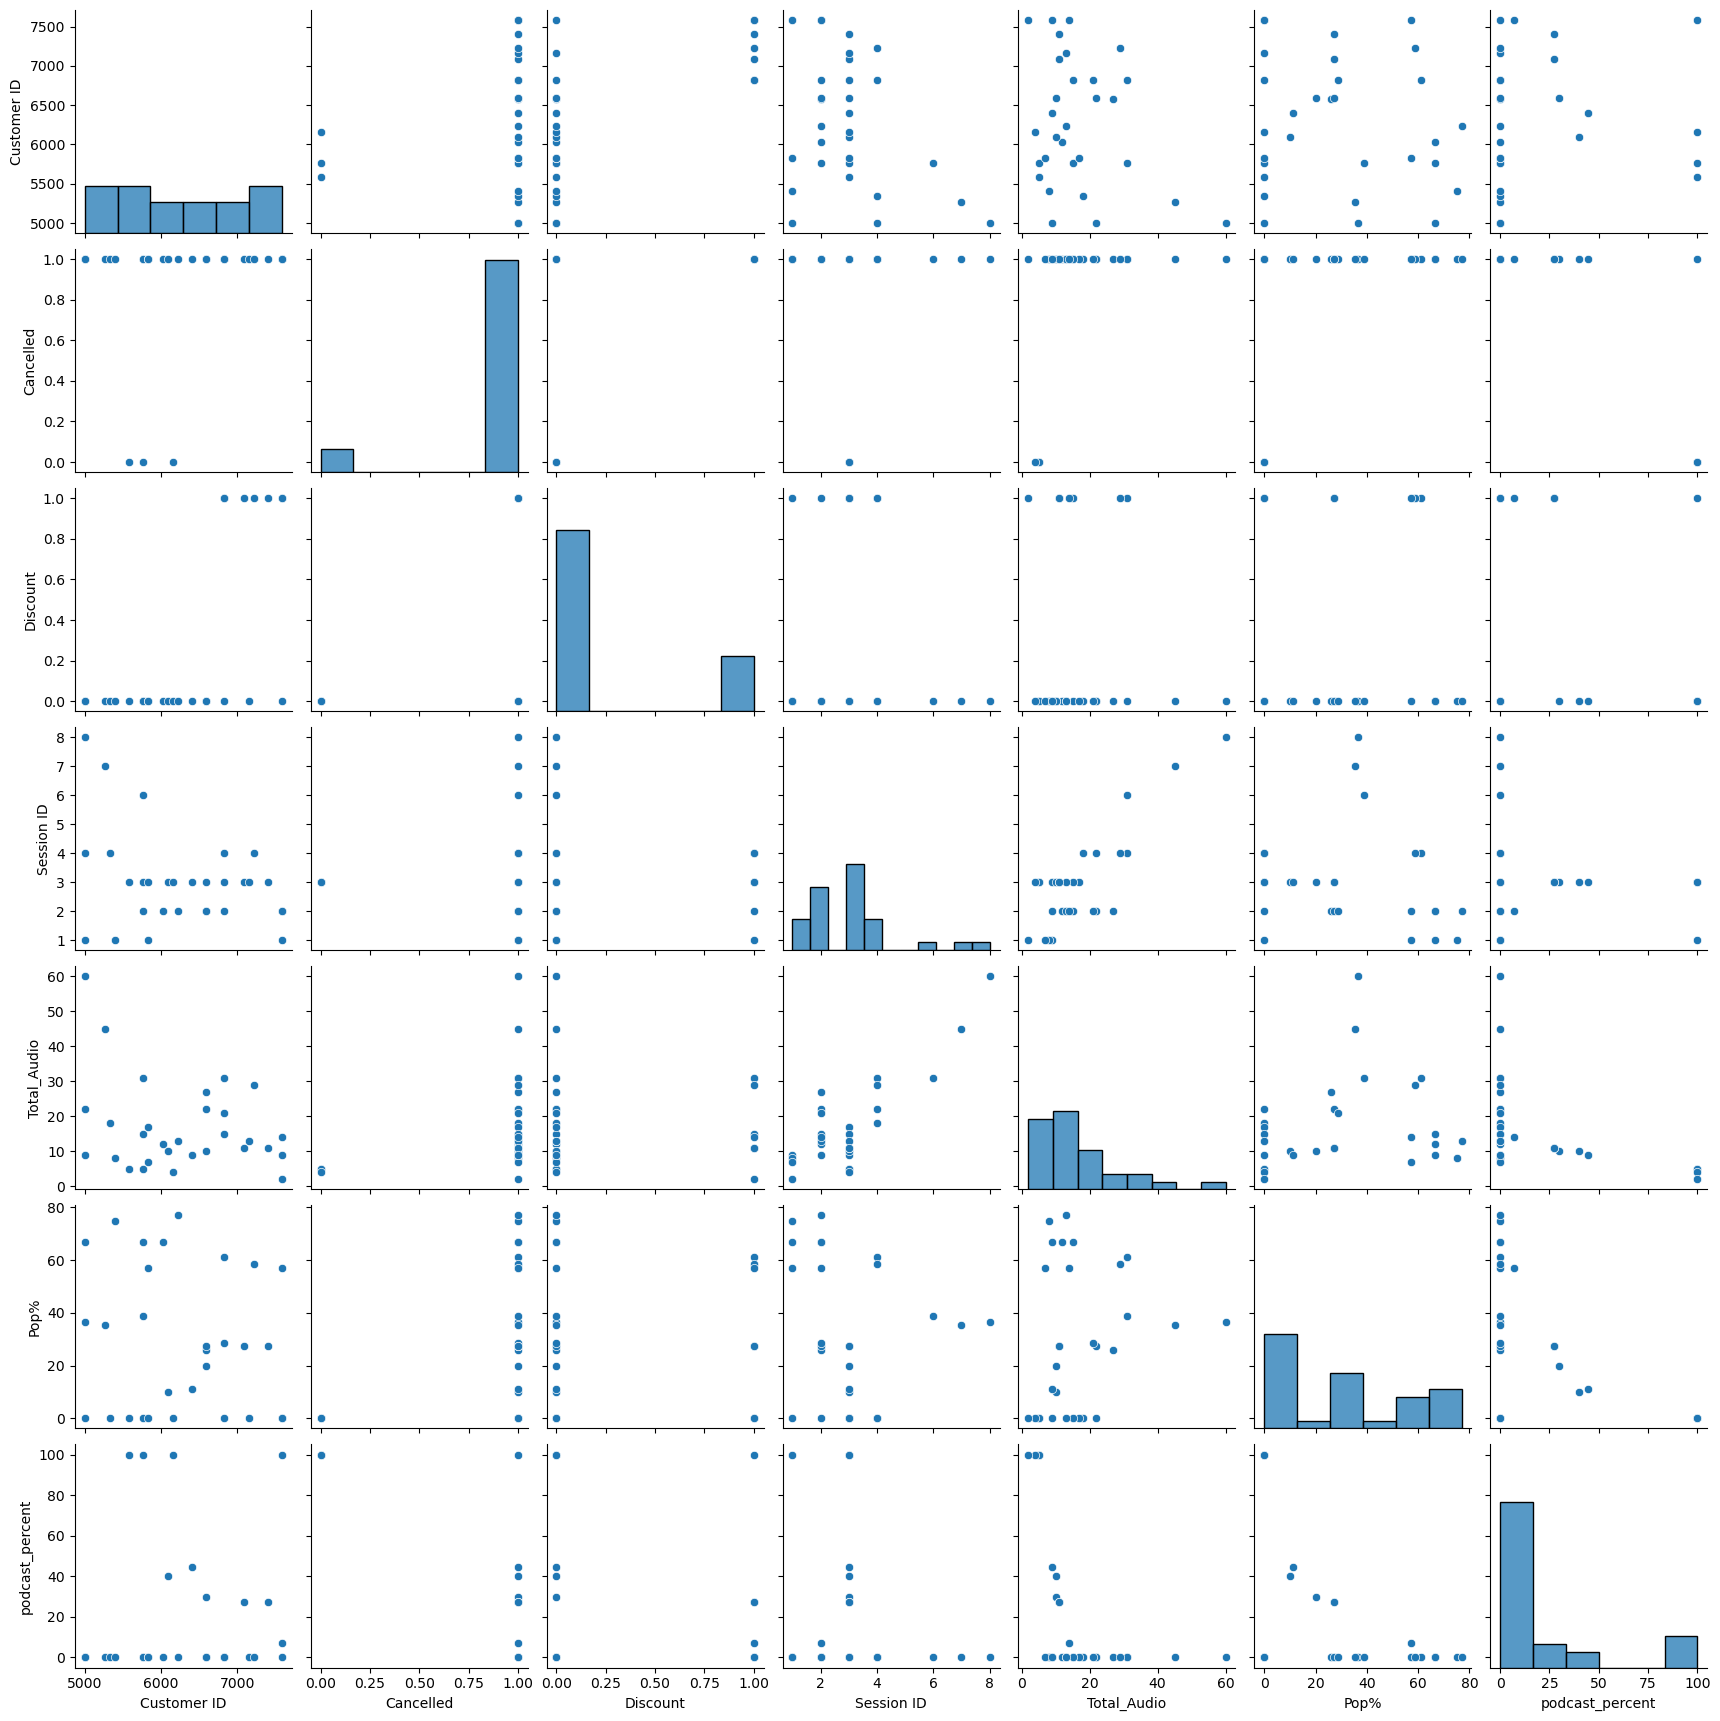

In [179]:
sns.pairplot(model_table4);

In [181]:
# Look at the correlations
model_table4.corr()

,Customer ID,Cancelled,Discount,Session ID,Total_Audio,Pop%,podcast_percent
Customer ID,1.000000,1.837580e-01,0.648514,-3.370828e-01,-0.277598,-0.122421,0.083072
Cancelled,0.183758,1.000000e+00,0.183892,-4.781466e-17,0.326306,0.362453,-0.789059
Discount,0.648514,1.838924e-01,1.000000,-4.887653e-02,-0.030648,0.080978,0.062925
Session ID,-0.337083,-4.781466e-17,-0.048877,1.000000e+00,0.811683,-0.142785,-0.125458
Total_Audio,-0.277598,3.263061e-01,-0.030648,8.116835e-01,1.000000,0.198084,-0.494889
Pop%,-0.122421,3.624527e-01,0.080978,-1.427852e-01,0.198084,1.000000,-0.488331
podcast_percent,0.083072,-7.890589e-01,0.062925,-1.254576e-01,-0.494889,-0.488331,1.000000


In [ ]:
# Observations
## A discount is correlated with a cancellation
## The more listening sessions, the fewer cancellations
## The more pop music, the more cancellations
## Podcast listening history seems unrelated to cancellations